In [29]:
import pandas as pd
import numpy as np

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.model_selection import validation_curve
from sklearn.model_selection import learning_curve
from sklearn import metrics
from sklearn.metrics import fbeta_score, make_scorer
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import r2_score


import matplotlib
import matplotlib.pyplot as plt

In [30]:
import sys
sys.path.append('../lib')

import XgbAdjustmentHelper as xgbhelper
import SklearnModelCurve as curve_helper

In [42]:
munged_train_df = pd.read_csv('../data/offline/train.csv', index_col=0)
munged_test_df = pd.read_csv('../data/offline/test.csv', index_col=0)
y_train_df = pd.read_csv('../data/offline/y_train.csv', index_col=0)

X_train, X_test, y_train, y_test = train_test_split(munged_train_df.values, y_train_df.values, test_size=0.5, random_state=1729)
X_all_train = munged_train_df.values
y_all_train = y_train_df['y'].values

In [43]:
feature_names = munged_train_df.columns

In [44]:
#粗调
rf_model = RandomForestRegressor(n_estimators=70, criterion='mse', max_depth=3, min_samples_split=2, 
                                  min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', 
                                  max_leaf_nodes=None, min_impurity_split=1e-07, bootstrap=True, 
                                  oob_score=False, n_jobs=-1, random_state=1729, verbose=0, warm_start=False)

params1 = {
 'n_estimators':[60,70, 80]
}
search = xgbhelper.ModelParamSearch(rf_model, params1, X_all_train, y_all_train, 'r2')


grid_scores
mean: 0.56005, std: 0.07581, params: {'n_estimators': 60}
mean: 0.56033, std: 0.07592, params: {'n_estimators': 70}
mean: 0.56026, std: 0.07581, params: {'n_estimators': 80}

best_params
{'n_estimators': 70}

best_score
0.5603287075036253


In [ ]:
0.5596029436752745
0.5592231432414312

In [34]:
# grid_scores
# mean: 0.56011, std: 0.07412, params: {'n_estimators': 50}
# mean: 0.56033, std: 0.07440, params: {'n_estimators': 70}
# mean: 0.56016, std: 0.07428, params: {'n_estimators': 90}

# best_params
# {'n_estimators': 70}

# best_score
# 0.5603298962758696

# grid_scores
# mean: 0.48948, std: 0.05201, params: {'n_estimators': 100, 'max_depth': 2}
# mean: 0.48950, std: 0.05206, params: {'n_estimators': 500, 'max_depth': 2}
# mean: 0.48948, std: 0.05206, params: {'n_estimators': 1000, 'max_depth': 2}
# mean: 0.55987, std: 0.07416, params: {'n_estimators': 100, 'max_depth': 3}
# mean: 0.55979, std: 0.07420, params: {'n_estimators': 500, 'max_depth': 3}
# mean: 0.55979, std: 0.07429, params: {'n_estimators': 1000, 'max_depth': 3}
# mean: 0.55580, std: 0.07147, params: {'n_estimators': 100, 'max_depth': 4}
# mean: 0.55556, std: 0.07210, params: {'n_estimators': 500, 'max_depth': 4}
# mean: 0.55574, std: 0.07233, params: {'n_estimators': 1000, 'max_depth': 4}

# best_params
# {'n_estimators': 100, 'max_depth': 3}

# best_score
# 0.5598719501150295

In [45]:
rf_model = RandomForestRegressor(n_estimators=70, criterion='mse', max_depth=3, min_samples_split=2, 
                                  min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', 
                                  max_leaf_nodes=None, min_impurity_split=1e-07, bootstrap=True, 
                                  oob_score=False, n_jobs=-1, random_state=1729, verbose=0, warm_start=False)

params2 = {
 'min_samples_split':[2, 3, 4],
 'min_samples_leaf':[1, 2, 3, 4]
}
search = xgbhelper.ModelParamSearch(rf_model, params2, X_all_train, y_all_train, 'r2')


grid_scores
mean: 0.56033, std: 0.07592, params: {'min_samples_leaf': 1, 'min_samples_split': 2}
mean: 0.56033, std: 0.07592, params: {'min_samples_leaf': 1, 'min_samples_split': 3}
mean: 0.56033, std: 0.07592, params: {'min_samples_leaf': 1, 'min_samples_split': 4}
mean: 0.56030, std: 0.07589, params: {'min_samples_leaf': 2, 'min_samples_split': 2}
mean: 0.56030, std: 0.07589, params: {'min_samples_leaf': 2, 'min_samples_split': 3}
mean: 0.56030, std: 0.07589, params: {'min_samples_leaf': 2, 'min_samples_split': 4}
mean: 0.56034, std: 0.07590, params: {'min_samples_leaf': 3, 'min_samples_split': 2}
mean: 0.56034, std: 0.07590, params: {'min_samples_leaf': 3, 'min_samples_split': 3}
mean: 0.56034, std: 0.07590, params: {'min_samples_leaf': 3, 'min_samples_split': 4}
mean: 0.56059, std: 0.07614, params: {'min_samples_leaf': 4, 'min_samples_split': 2}
mean: 0.56059, std: 0.07614, params: {'min_samples_leaf': 4, 'min_samples_split': 3}
mean: 0.56059, std: 0.07614, params: {'min_samples_l

In [47]:
avg_score = 0

rf_model = RandomForestRegressor(n_estimators=70, criterion='mse', max_depth=3, min_samples_split=2, 
                                  min_samples_leaf=6, min_weight_fraction_leaf=0.0, max_features='auto', 
                                  max_leaf_nodes=None, min_impurity_split=1e-07, bootstrap=True, 
                                  oob_score=False, n_jobs=-1, random_state=1729, verbose=0, warm_start=False)

for i in range(10,20):
    X_train, X_test, y_train, y_test = train_test_split(X_all_train, y_all_train, test_size=0.19, random_state=i)
    rf_model.fit(X_train, y_train)
    y_pred = rf_model.predict(X_test)
    
    score = r2_score(y_test, y_pred)
    avg_score += score
    print(score)
    
print(avg_score / 10)

0.562560071345
0.604223922799
0.465109384164
0.574192952401
0.44457172146
0.626150840636
0.559103402228
0.605686693289
0.591436244108
0.585059176142
0.561809440857


In [48]:
0.561601970758

0.561601970758

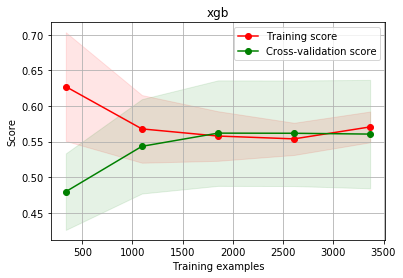

In [49]:
curve_helper.plot_learning_curve(rf_model, 'xgb', X_all_train, y_all_train, cv=5)

In [50]:
rf_model.fit(X_all_train, y_all_train)
y_pred = rf_model.predict(munged_test_df.values)
output = pd.DataFrame({'id': munged_test_df.index, 'y': y_pred})
output.to_csv('../data/online/randomforest-ica.csv', index=False)